## Tensorflow基本使用方法

In [1]:
import tensorflow as tf

图计算：

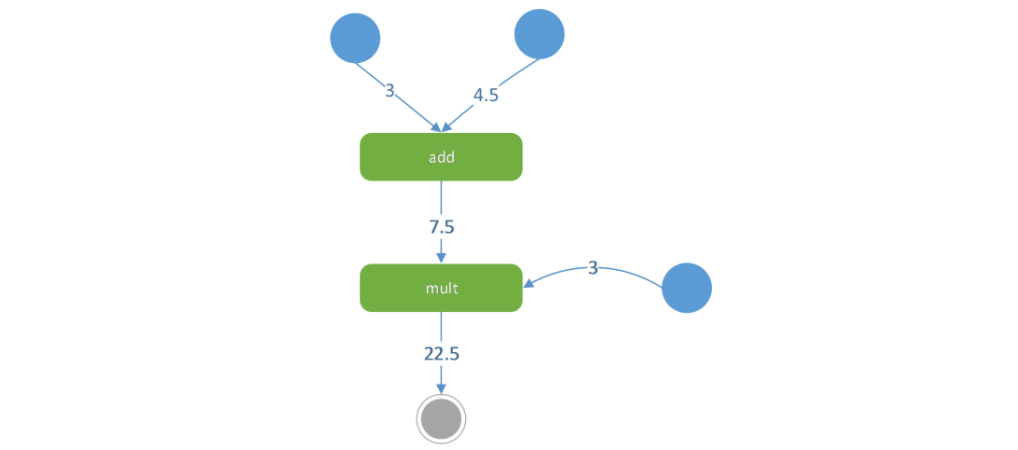

- 节点：
  - 数据
    - constant, variable, placeholder
    - 是张量（Tensor）
      - 其实就是高维数组
      - 0维：一个数；1维：数组；2维：矩阵
  - 运算
    - 各种函数&操作
    - 如：tf.add, tf.multiply, 以及一些重载的运算符（可以直接使用 +， \*）
    - 广播机制：比如一个数组`[1, 2, 3]`和一个数`1`相加，会看作数组中每一个元素与数相加，得到`[2, 3, 4]`
- 边：节点之间的关系

### 常数操作

In [2]:
const1 = tf.constant(3, dtype=tf.float32, name='const2')
const2 = tf.constant(4.5)

In [3]:
added = tf.add(const1, const2)  # operation节点
const3 = tf.constant(3.0)
mult = added * const3
print(mult)

Tensor("mul:0", shape=(), dtype=float32)


In [4]:
sess = tf.Session()
print(sess.run(mult))
sess.close()

22.5


In [5]:
with tf.Session() as sess:  # __enter__和__exit__
    print(sess.run([mult, added]))

[22.5, 7.5]


### 内置的常数生成

In [6]:
a = tf.zeros([2,3], dtype=tf.float32)
b = tf.ones([3,2])
c = tf.constant(2.0, shape=[2,2])
d = tf.random_normal([2,2], mean=3, stddev=4)
mul = tf.matmul(a,b)  # 2*2的矩阵，全是0
added = tf.add(mul, c)  # 2*2的矩阵，全是2

e = tf.constant([1,2,3])
f = tf.constant([5,6,7])
mul2 = tf.multiply(e,f)
added2 = tf.add(e, 1)
added3 = e + 1

In [7]:
with tf.Session() as sess:
    print(sess.run(added))
    print(sess.run(mul2))
    print(sess.run(added2))
    print(sess.run(added3))

[[2. 2.]
 [2. 2.]]
[ 5 12 21]
[2 3 4]
[2 3 4]


### 变量操作

注意要有初始化
- 声明变量的时候给的数不是变量本身，所以需要建立起这个数和变量之间的关系
- 也可以用其他节点初始化变量，这时就可以看出初始化操作的必要性
  - 变量和传入的节点不是相同的关系，所以需要另外建立联系

可以进行赋值
- 使用tf.assign(目标Variable，源节点)

In [8]:
a = tf.constant(2)
b = tf.Variable(5)
c = tf.Variable(a + 5)
d = tf.multiply(c, c)
update = tf.assign(c, d)

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run([update]))
    print(sess.run([update]))

[49]
[2401]


### 占位符placeholder

需要使用`feed_dict`进行赋值

In [10]:
m = tf.placeholder(tf.float32)
n = tf.placeholder(tf.float32)
added = m + n
with tf.Session() as sess:
    print(sess.run(added, feed_dict={m: 1, n: 2}))

3.0
